### Data Description
- "#" id: the identification to seperate each sample data
- realSum	The total price of the Airbnb listing. (Numeric)
- room_type	The type of room being offered (e.g. private, shared, etc.). (Categorical)
- room_shared	Whether the room is shared or not. (Boolean)
- room_private	Whether the room is private or not. (Boolean)
- person_capacity	The maximum number of people that can stay in the room. (Numeric)
- host_is_superhost	Whether the host is a superhost or not. (Boolean)
- multi	Whether the listing is for multiple rooms or not. (Boolean)
- biz	Whether the listing is for business purposes or not. (Boolean)
- cleanliness_rating	The cleanliness rating of the listing. (Numeric)
- guest_satisfaction_overall	The overall guest satisfaction rating of the listing. (Numeric)
- bedrooms	The number of bedrooms in the listing. (Numeric)
- dist	The distance from the city centre. (Numeric)
- metro_dist	The distance from the nearest metro station. (Numeric)
-lng	The longitude of the listing. (Numeric)
-lat	The latitude of the listing. (Numeric)

There are 15 variables in total. Except for that, there is 2 hidden variable which is whether it is weekdays or weekends. And the Areas each dataset taken from.

#### Brief Description
This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities(barcelona, paris and vienna). Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends.

### Question
Explanatory Variable: Person Capacity
Response Variable:Guest satisfaction
I want to know whether the Person Capacity have impact on Guest satisfaction, if so, what is the trend of the 2 variables
My question can be used for prediction, and it can be an inference to whether these 2 have relationship

I may also explore that based on different city and timeslot(weekdays or weekends), and see if there is a trend from different situations.

### Exploratory Data Analysis and Visualization

X person_capacity guest_satisfaction_overall
1 0 4                91                       
2 1 2                88                       
3 2 4                88                       
4 3 3                91                       
5 4 3                91                       
6 5 3               100

`geom_smooth()` using formula = 'y ~ x'


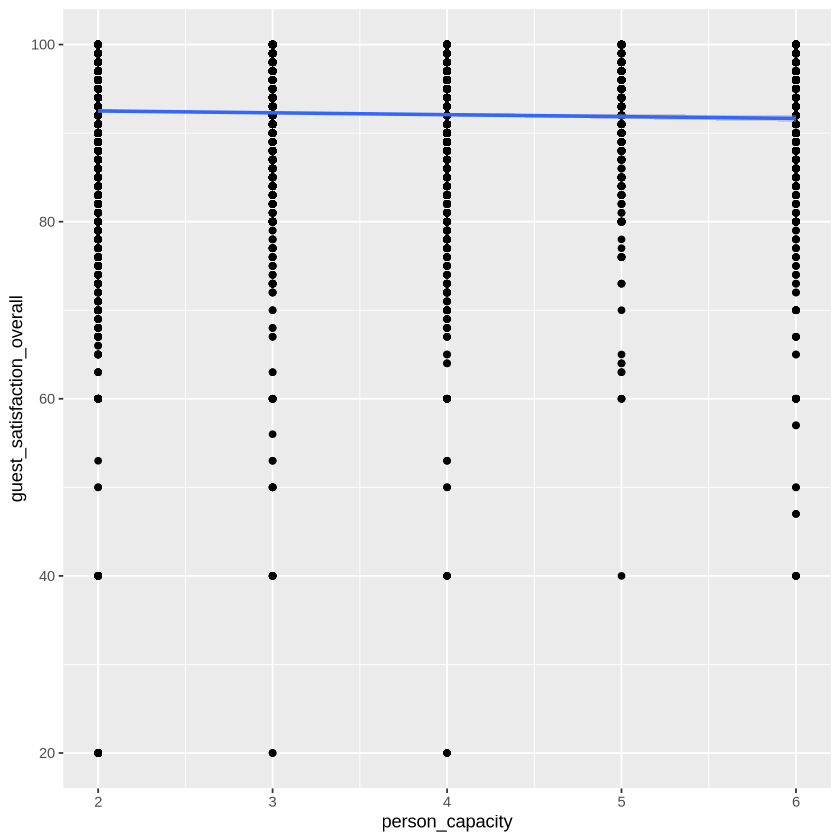

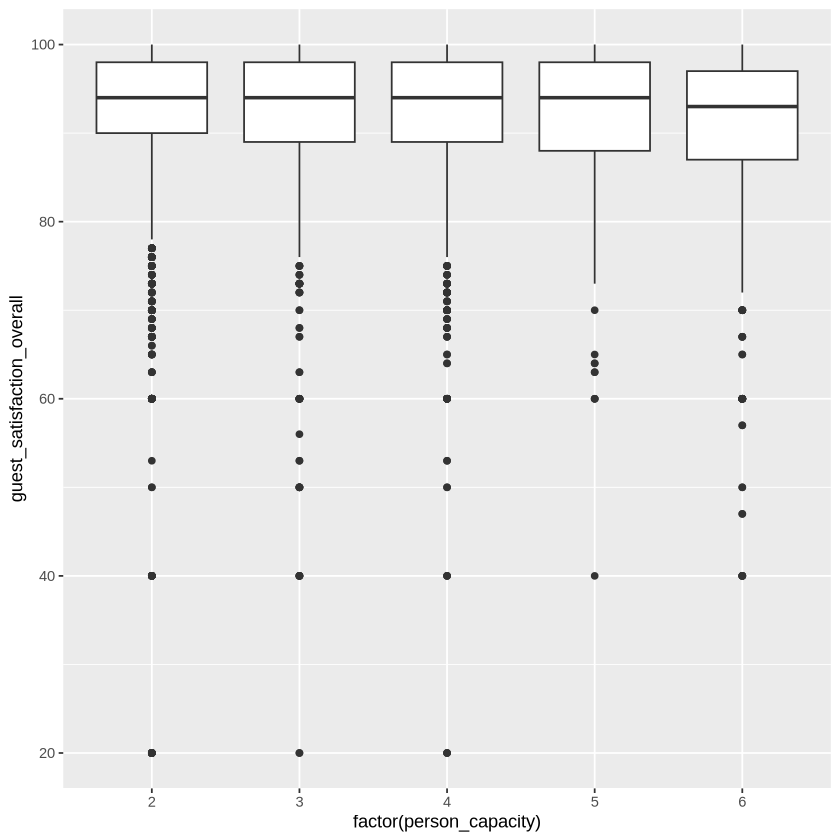

In [18]:
library(dplyr)
library(ggplot2)

barcelona_weekdays<- read.csv("barcelona_weekdays.csv")
barcelona_weekends<- read.csv("barcelona_weekends.csv")
paris_weekdays<-read.csv("paris_weekdays.csv")
paris_weekends<-read.csv("paris_weekends.csv")
vienna_weekdays<-read.csv("vienna_weekdays.csv")
vienna_weekends<-read.csv("vienna_weekends.csv")

#try these if you want
# head(barcelona_weekdays)
# head(barcelona_weekends)

# head(paris_weekdays)
# head(paris_weekends)

# head(vienna_weekdays)
# head(vienna_weekends)


# NOTE! this combination is just to get an overall sight of the data
# The data will be seprated in the real experiment.
combined<- bind_rows(barcelona_weekdays,barcelona_weekends,
                     paris_weekdays,paris_weekends,
                     vienna_weekdays,vienna_weekends)

combined_tidy<- combined %>%
select(X,person_capacity,guest_satisfaction_overall)

test_plot<- combined_tidy%>%
ggplot(aes(x=person_capacity,y=guest_satisfaction_overall))+
geom_point()+
geom_smooth(method =  "lm",se = TRUE)

test_plot_2<- combined_tidy%>%
ggplot(aes(x=factor(person_capacity),y=guest_satisfaction_overall))+
geom_boxplot()

head(combined_tidy)
test_plot
test_plot_2

### Methods and Plan

I would like to use linear regression to examine whether Person Capacity has an impact on Guest Satisfaction, treating them both as numerical variables. I will use the p-value from the regression output to test whether there is a statistically significant relationship between them.

For prediction, I will check the residual plot to assess model fit, and I may explore patterns or differences across cities and time slots (weekdays vs. weekends) by including interaction terms or stratified models.

- Why is this method appropriate?
  Linear regression is a good first step when both variables are numeric. It provides an interpretable slope and allows us to:

Quantify the trend between Person Capacity and Guest Satisfaction

Conduct hypothesis testing using the p-value

Generate predictions and examine model diagnostics

Additionally, linear regression is flexible and can be extended to include other variables (e.g., city, time slot) to control for their effects.

- Which assumptions are required, if any, to apply the method selected?
 The key assumptions of linear regression are:

Linearity: The relationship between predictors and response is linear.

Independence of observations.

Homoscedasticity: Constant variance of residuals.

Normality of residuals for inference (e.g., p-values, confidence intervals).

Also, for hypothesis testing, I will define:

Null Hypothesis: Person Capacity has no effect on Guest Satisfaction (slope = 0).

Alternative Hypothesis: There is an effect (slope ≠ 0).
  
- What are the potential limitations or weaknesses of the method selected?
  the simple linear regression may be the not the best choice, maybe use the possion linear regression can be better because the  satisfication score is a count.
  Additionally, linear regression does not automatically account for group differences (e.g., city, weekend) unless I model those using interaction terms or stratification.